# Deskripsi Proyek
Nasabah Bank Beta pergi meninggalkan perusahaan: sedikit demi sedikit, jumlah mereka berkurang setiap bulannya. Para pegawai bank menyadari bahwa akan lebih menghemat biaya jika perusahaan fokus untuk mempertahankan nasabah lama mereka yang setia daripada menarik nasabah baru.

Pada kasus ini, tugas kita adalah untuk memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak. Kamu memiliki data terkait perilaku para klien di masa lalu dan riwayat pemutusan kontrak mereka dengan bank.

Buat sebuah model dengan skor F1 semaksimal mungkin. Untuk bisa dinyatakan lulus dari peninjauan, kamu memerlukan skor F1 minimal 0,59 untuk test dataset.

Setelah itu, kamu akan membuat perubahan yang diperlukan pada pekerjaanmu dan mengirimkannya kembali untuk tinjauan kedua.

Selain itu, ukur metrik AUC-ROC dan bandingkan metrik tersebut dengan skor F1.

# Pendahuluan
Pada saat melakukan analisis, kita perlu merumuskan beberapa hipotesis yang perlu kita uji lebih terlebih dahulu. Tidak semua hipotesis yang kita kerjakan bisa langsung digunakan, kita harus bisa memilih hipotesis mana yang paling tepat untuk menyelesaikan masalah-masalah yang ada pada data yang kita miliki. Untuk membuat keputusan yang tepat, kita harus memahami apakah asumsi yang kita buat sudah tepat atau belum.

# Tujuan
Memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak. 

# Langkah Pengerjaan:

    1. Unduh dan siapkan datanya. 
    Pastikan kamu menjelaskan logika yang kamu gunakan selama proses persiapan.
    
    2. Periksa keseimbangan setiap kelas (class balance). 
    Latih modelmu tanpa mempertimbangkan ketidakseimbangan (imbalance). Jelaskan temuanmu secara singkat.
    
    3. Tingkatkan kualitas model. 
    Pastikan bahwa kamu menggunakan setidaknya dua pendekatan untuk memperbaiki ketidakseimbangan kelas (imbalance class). Gunakan training dan validation set untuk menemukan model terbaik serta kumpulan parameter terbaik. Jelaskan temuanmu secara singkat. Gunakan training set untuk memilih parameter terbaik. Tingkatkan kualitas model dengan memperhatikan ketidakseimbangan kelas (imbalance class) Latih beberapa model yang berbeda dan temukan yang terbaik.
    
    4. Jalankan pengujian terakhir.

# Deskripsi Data
Data yang kamu butuhkan bisa ditemukan di file /datasets/Churn.csv. Unduh dataset.

**Fitur-fitur:**
- RowNumber — indeks string data
- CustomerId — ID pelanggan
- Surname — nama belakang
- CreditScore — skor kredit
- Geography — negara domisili
- Gender — gender
- Age — umur
- Tenure — jangka waktu jatuh tempo untuk deposito tetap nasabah (tahun)
- Balance — saldo rekening
- NumOfProducts — jumlah produk bank yang digunakan oleh nasabah
- HasCrCard — apakah nasabah memiliki kartu kredit (1 - jika ya; 0 - jika tidak)
- IsActiveMember — tingkat keaktifan nasabah (1 - jika ya; 0 - jika tidak)
- EstimatedSalary — estimasi gaji
- Target
- Exited — apakah nasabah telah berhenti (1 - jika ya; 0 - jika tidak)

**Target:**
- Exited — apakah nasabah telah berhenti (1 - jika ya; 0 - jika tidak)

## Unduh dan Siapkan Datanya
Buka dan periksa file data secara teliti. File path:  /datasets/Churn.csv. Kemudian unduh dataset.

### Buka File Data

In [1]:
# Import Library
import pandas as pd

In [2]:
# Muat file data
file_path = "/datasets/Churn.csv"
data = pd.read_csv(file_path)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


### Persiapan Data (Pra-pemrosesan)

In [3]:
# Check duplikasi data
print("Jumlah duplikasi data:", data.duplicated().sum())

Jumlah duplikasi data: 0


In [4]:
# Pengecekan Missing Values
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
# Menganalisa data statistik deskriptif untuk mengisi missing values pada kolom Tenure
data['Tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

**Dari hasil diatas dapat dilihat bahwa nilai median dengan mean memiliki nilai yang tidak terpaut jauh, sehingga untuk mengisi misiing values bisa dipertimbangkan dengan menggunakan nilai median. Tapi sebelum itu kita lihat dulu korelasi antara Tenure dengan kolom yang lain.**

In [6]:
# Korelasi dengan Fitur Lain
correlation_matrix = data.corr()
correlation_with_tenure = correlation_matrix['Tenure'].sort_values(ascending=False)
correlation_with_tenure

Tenure             1.000000
HasCrCard          0.027232
NumOfProducts      0.011979
EstimatedSalary    0.010520
CreditScore       -0.000062
RowNumber         -0.007322
Balance           -0.007911
Age               -0.013134
Exited            -0.016761
CustomerId        -0.021418
IsActiveMember    -0.032178
Name: Tenure, dtype: float64

In [7]:
# Visualisasi distribusi 'Tenure'
import matplotlib.pyplot as plt
import seaborn as sns

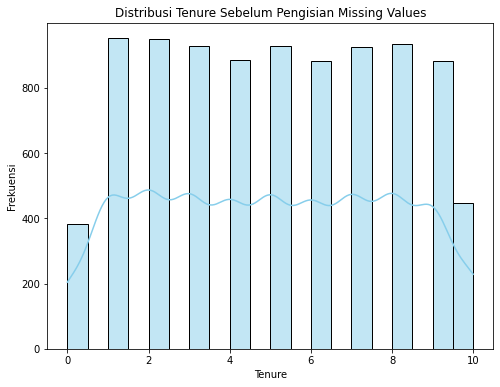

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Tenure'].dropna(), kde=True, bins=20, color='skyblue')
plt.title('Distribusi Tenure Sebelum Pengisian Missing Values')
plt.xlabel('Tenure')
plt.ylabel('Frekuensi')
plt.show()

**Dari hasil diatas dapat dilihat bahwa korelasi Tenure dengan yang lain relatif rendah, sehingga penggunaan informasi dari kolom selain Tenure untuk mengisi missing values bisa jadi tidak relevan. 
Dari visualisasi grafik terlihat bahwa distribusi data 'Tenure' ini cenderung simetris.**

**Dengan gambaran ini, penggunaan nilai median untuk mengisi missing values menjadi lebih beralasan**

In [9]:
# Mengisi Missing Values pada Kolom 'Tenure' dengan Median
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)

In [10]:
# Check pengisian missing values apakah sudah berhasil
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Drop kolom yang tidak diperlukan
data_cleaned = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data_cleaned.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Kesimpulan Langkah 1:**
- Terdapat missing data pada kolom 'Tenure'
- Misiing data sudah diisi dengan nilai median dengan sebelumnya menganalisa data deskriptif, korelasi data Tenure dengan yang lain, serta visualisasi distribusi 'Tenure'.

## Periksa keseimbangan setiap kelas (class balance). 
Latih modelmu tanpa mempertimbangkan ketidakseimbangan (imbalance). Jelaskan temuan yang didapatkan secara singkat.

Untuk memeriksa keseimbangan kelas, kita dapat melihatnya pada distribusi target kelas. Kolom 'Exited' merupakan target, yang menunjukkan apakah nasabah telah berhenti (1) atau tidak (0).

In [12]:
# One-Hot Encoding untuk kolom kategorikal
data_ohe = pd.get_dummies(data_cleaned, columns=['Geography', 'Gender'], drop_first=True)
data_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


In [13]:
# Normalisasi fitur numerik
from sklearn.preprocessing import StandardScaler

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = StandardScaler()
data_ohe[numerical_features] = scaler.fit_transform(data_ohe[numerical_features])

In [14]:
# Memeriksa keseimbangan kelas
class_distribution = data_ohe['Exited'].value_counts()
class_distribution

0    7963
1    2037
Name: Exited, dtype: int64

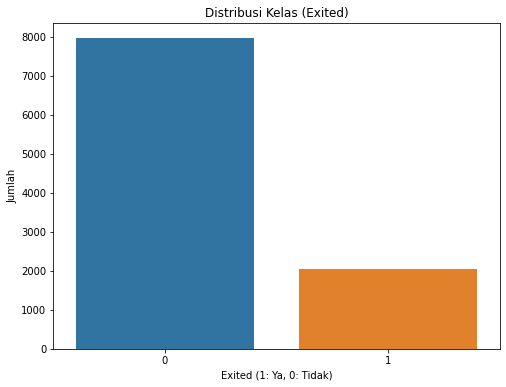

In [15]:
# Visualisasi distribusi kelas
plt.figure(figsize=(8,6))
sns.countplot(x='Exited', data=data_ohe)
plt.title('Distribusi Kelas (Exited)')
plt.xlabel('Exited (1: Ya, 0: Tidak)')
plt.ylabel('Jumlah')
plt.show()

**Dari grafik diatas dapat terlihat ketidakseimbangan kelas, dimana kelas 0 memiliki jumlah data yang jauh lebih besar dibandingkan kelas 1.**

### Pemisahan data menjadi training set dan test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Pisahkan fitur (X) dan target (y)
X = data_ohe.drop(columns=['Exited'])
y = data_ohe['Exited']

In [18]:
# Pisahkan data menjadi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [19]:
# Cek distribusi kelas di training set
class_distribution_train = y_train.value_counts()
class_distribution_train

0    6377
1    1623
Name: Exited, dtype: int64

### Melatih Model Logistic Regression, Decision Tree, dan Random Forest

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [21]:
# Inisialisasi model
logreg_model = LogisticRegression(random_state=123)
dt_model = DecisionTreeClassifier(random_state=123)
rf_model = RandomForestClassifier(random_state=123)

In [22]:
# Latih model tanpa penanganan ketidakseimbangan kelas
logreg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [23]:
# Evaluasi model pada test set
logreg_pred = logreg_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

In [24]:
# Tampilkan classification report
print("Logistic Regression:\n", classification_report(y_test, logreg_pred))
print("Decision Tree:\n", classification_report(y_test, dt_pred))
print("Random Forest:\n", classification_report(y_test, rf_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1586
           1       0.63      0.23      0.34       414

    accuracy                           0.81      2000
   macro avg       0.73      0.60      0.61      2000
weighted avg       0.79      0.81      0.78      2000

Decision Tree:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1586
           1       0.51      0.52      0.52       414

    accuracy                           0.80      2000
   macro avg       0.69      0.70      0.69      2000
weighted avg       0.80      0.80      0.80      2000

Random Forest:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1586
           1       0.76      0.45      0.57       414

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0

**Kesimpulan Langkah 2:**
- Logistic Regression 

F1-score untuk kelas 0 (Label 0): 0.89

F1-score untuk kelas 1 (Label 1): 0.34

- Decision Tree

F1-score untuk kelas 0 (Label 0): 0.87

F1-score untuk kelas 1 (Label 1): 0.52

- Random Forest

F1-score untuk kelas 0 (Label 0): 0.91

F1-score untuk kelas 1 (Label 1): 0.57

## Penanganan Ketidakseimbangan Kelas menggunakan teknik Upsampling dan Downsampling

#### Teknik Upsampling dan Downsampling


In [25]:
from sklearn.utils import resample

In [26]:
# Gabungkan training set kembali
train_data = pd.concat([X_train, y_train], axis=1)

In [27]:
# Pisahkan kelas mayoritas dan minoritas
class_majority = train_data[train_data['Exited'] == 0]
class_minority = train_data[train_data['Exited'] == 1]

In [28]:
# Upsampling kelas minoritas
class_minority_upsampled = resample(class_minority, replace=True, n_samples=len(class_majority), random_state=123)

In [29]:
# Gabungkan kembali hasil upsampling dengan kelas mayoritas
upsampled_data = pd.concat([class_majority, class_minority_upsampled])

In [30]:
# Downsampling kelas mayoritas
class_majority_downsampled = resample(class_majority, replace=False, n_samples=len(class_minority), random_state=123)

In [31]:
# Gabungkan kembali hasil downsampling dengan kelas minoritas
downsampled_data = pd.concat([class_majority_downsampled, class_minority])

### Membagi data setelah upsampling & downsampling & Melatih Model

#### Pisahkan fitur dan target setelah upsampling & downsampling

In [32]:
# Pisahkan fitur dan target pada data yang sudah di-upsample dan di-downsample
X_upsampled = upsampled_data.drop(columns=['Exited'])
y_upsampled = upsampled_data['Exited']

In [33]:
X_downsampled = downsampled_data.drop(columns=['Exited'])
y_downsampled = downsampled_data['Exited']

#### Latih Model pada data setelah upsampling & downsampling

In [34]:
# Latih model Logistic Regression pada data yang di-upsampled
logreg_model_upsampled = LogisticRegression(random_state=123)
logreg_model_upsampled.fit(X_upsampled, y_upsampled)

LogisticRegression(random_state=123)

In [35]:
# Latih model Logistic Regression pada data yang di-downsampled
logreg_model_downsampled = LogisticRegression(random_state=123)
logreg_model_downsampled.fit(X_downsampled, y_downsampled)

LogisticRegression(random_state=123)

### Pencarian Parameter Terbaik
Mencari parameter terbaik untuk model menggunakan teknik GridSearchCV.

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# Parameter grid untuk Decision Tree
param_grid_dt = {'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

In [38]:
# Inisialisasi model Decision Tree
dt_model_tuned = DecisionTreeClassifier(random_state=123)

In [39]:
# Membuat objek GridSearchCV untuk Decision Tree
grid_search_dt = GridSearchCV(dt_model_tuned, param_grid_dt, scoring='f1', cv=5)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [40]:
# Parameter terbaik untuk Decision Tree
best_params_dt = grid_search_dt.best_params_

In [41]:
# Parameter grid untuk Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

In [42]:
# Inisialisasi model Random Forest
rf_model_tuned = RandomForestClassifier(random_state=123)

In [43]:
# Membuat objek GridSearchCV untuk Random Forest
grid_search_rf = GridSearchCV(rf_model_tuned, param_grid_rf, scoring='f1', cv=5)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [44]:
# Parameter terbaik untuk Random Forest
best_params_rf = grid_search_rf.best_params_

### Melatih Ulang Model dengan Parameter Terbaik

In [45]:
# Latih ulang model Decision Tree dengan parameter terbaik
dt_model_best = DecisionTreeClassifier(**best_params_dt, random_state=123)
dt_model_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=123)

In [46]:
# Latih ulang model Random Forest dengan parameter terbaik
rf_model_best = RandomForestClassifier(**best_params_rf, random_state=123)
rf_model_best.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50, random_state=123)

**Kesimpulan Langkah 3 :**

Mengatasi ketidakseimbangan kelas dengan menggunakan teknik Upsampling dan Downsampling serta mengoptimalkan parameter model menggunakan GridSearchCV. Hal ini dilakukan untuk meningkatkan kinerja model dalam menangani data yang tidak seimbang.

## Pengujian Terakhir dan Mengukur Metrik

### F1 Score dan ROC-AUC Score

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score

# Fungsi untuk menampilkan kurva ROC
def plot_roc_curve(y_true, y_prob, model_name):
    auc = roc_auc_score(y_true, y_prob)
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

In [48]:
# Fungsi untuk menampilkan hasil evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    plot_roc_curve(y_test, y_prob, model.__class__.__name__)

Logistic Regression (Tanpa Penanganan Ketidakseimbangan):
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1586
           1       0.63      0.23      0.34       414

    accuracy                           0.81      2000
   macro avg       0.73      0.60      0.61      2000
weighted avg       0.79      0.81      0.78      2000

F1 Score: 0.33628318584070793


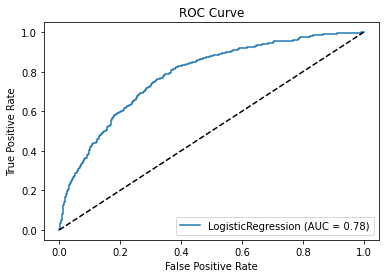

In [49]:
# Evaluasi model Logistic Regression tanpa penanganan ketidakseimbangan
print("Logistic Regression (Tanpa Penanganan Ketidakseimbangan):")
evaluate_model(logreg_model, X_test, y_test)

Logistic Regression (Upsampling):
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1586
           1       0.39      0.73      0.51       414

    accuracy                           0.71      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.80      0.71      0.73      2000

F1 Score: 0.5097046413502109


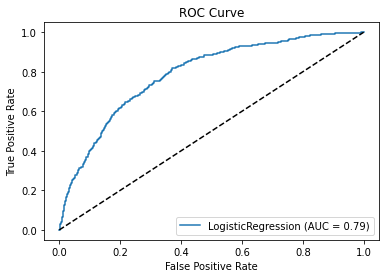

In [50]:
# Evaluasi model Logistic Regression dengan upsampling
print("Logistic Regression (Upsampling):")
evaluate_model(logreg_model_upsampled, X_test, y_test)

Logistic Regression (Downsampling):
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      1586
           1       0.39      0.72      0.50       414

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.73      2000

F1 Score: 0.5033783783783784


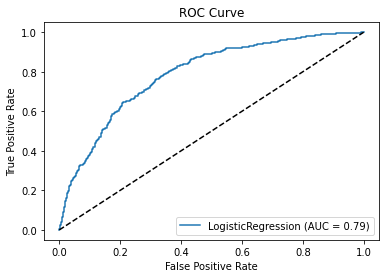

In [51]:
# Evaluasi model Logistic Regression dengan downsampling
print("Logistic Regression (Downsampling):")
evaluate_model(logreg_model_downsampled, X_test, y_test)

Decision Tree (Parameter Terbaik):
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      1586
           1       0.72      0.50      0.59       414

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

F1 Score: 0.5917496443812235


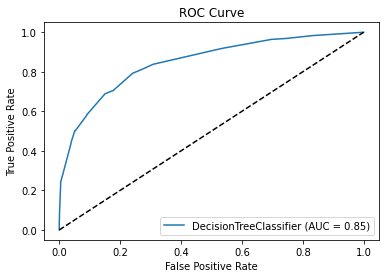

In [52]:
# Evaluasi model Decision Tree dengan parameter terbaik
print("Decision Tree (Parameter Terbaik):")
evaluate_model(dt_model_best, X_test, y_test)

Random Forest (Parameter Terbaik):
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1586
           1       0.76      0.45      0.56       414

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000

F1 Score: 0.5640243902439025


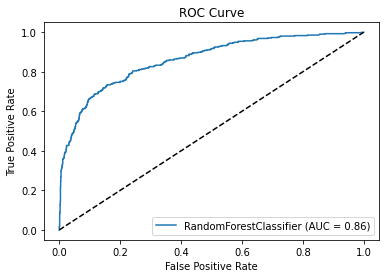

In [53]:
# Evaluasi model Random Forest dengan parameter terbaik
print("Random Forest (Parameter Terbaik):")
evaluate_model(rf_model_best, X_test, y_test)

In [54]:
# Fungsi untuk mengevaluasi dan mencetak skor F1 dari setiap model
def evaluate_f1_score(model, X_test, y_test):
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print(f"{model.__class__.__name__} - F1 Score: {f1:.4f}")

# Evaluasi skor F1 dari setiap model
print("Skor F1 pada Dataset Pengujian:")
evaluate_f1_score(logreg_model, X_test, y_test)
evaluate_f1_score(logreg_model_upsampled, X_test, y_test)
evaluate_f1_score(logreg_model_downsampled, X_test, y_test)
evaluate_f1_score(dt_model_best, X_test, y_test)
evaluate_f1_score(rf_model_best, X_test, y_test)

Skor F1 pada Dataset Pengujian:
LogisticRegression - F1 Score: 0.3363
LogisticRegression - F1 Score: 0.5097
LogisticRegression - F1 Score: 0.5034
DecisionTreeClassifier - F1 Score: 0.5917
RandomForestClassifier - F1 Score: 0.5640


### Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Logistic Regression (Tanpa Penanganan Ketidakseimbangan):
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1586
           1       0.63      0.23      0.34       414

    accuracy                           0.81      2000
   macro avg       0.73      0.60      0.61      2000
weighted avg       0.79      0.81      0.78      2000

F1 Score: 0.33628318584070793


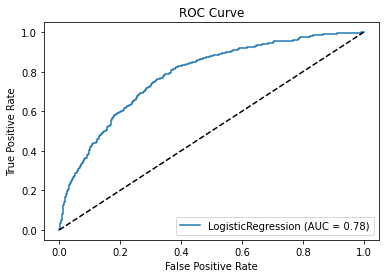

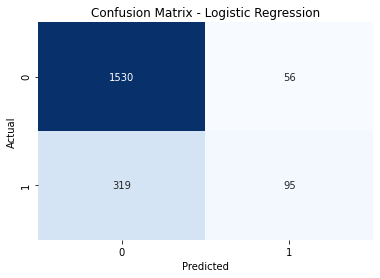

In [56]:
# Evaluasi model Logistic Regression tanpa penanganan ketidakseimbangan
print("Logistic Regression (Tanpa Penanganan Ketidakseimbangan):")
evaluate_model(logreg_model, X_test, y_test)
plot_confusion_matrix(y_test, logreg_model.predict(X_test), 'Logistic Regression')

In [57]:
# Kesimpulan dan Rekomendasi
# Fungsi untuk memberikan kesimpulan dan rekomendasi
def conclusion_recommendation(models):
    for model in models:
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

        print(f"\nModel: {model.__class__.__name__}")
        print(f"F1 Score: {f1:.4f}")
        print(f"ROC-AUC Score: {auc_roc:.4f}")

        if f1 > 0.5:
            print("Kesimpulan: Model memiliki kinerja yang baik dalam memprediksi kelas minoritas.")
        else:
            print("Kesimpulan: Model perlu diperbaiki untuk meningkatkan prediksi kelas minoritas.")

        if auc_roc > 0.8:
            print("Rekomendasi: Model dapat digunakan dengan percaya diri untuk tugas prediksi.")
        else:
            print("Rekomendasi: Model memerlukan peningkatan untuk meningkatkan akurasi prediksi.")


In [58]:
# List model yang dievaluasi
evaluated_models = [logreg_model, logreg_model_upsampled, logreg_model_downsampled,
                    dt_model_best, rf_model_best]

In [59]:
# Panggil fungsi kesimpulan dan rekomendasi
conclusion_recommendation(evaluated_models)


Model: LogisticRegression
F1 Score: 0.3363
ROC-AUC Score: 0.7831
Kesimpulan: Model perlu diperbaiki untuk meningkatkan prediksi kelas minoritas.
Rekomendasi: Model memerlukan peningkatan untuk meningkatkan akurasi prediksi.

Model: LogisticRegression
F1 Score: 0.5097
ROC-AUC Score: 0.7868
Kesimpulan: Model memiliki kinerja yang baik dalam memprediksi kelas minoritas.
Rekomendasi: Model memerlukan peningkatan untuk meningkatkan akurasi prediksi.

Model: LogisticRegression
F1 Score: 0.5034
ROC-AUC Score: 0.7875
Kesimpulan: Model memiliki kinerja yang baik dalam memprediksi kelas minoritas.
Rekomendasi: Model memerlukan peningkatan untuk meningkatkan akurasi prediksi.

Model: DecisionTreeClassifier
F1 Score: 0.5917
ROC-AUC Score: 0.8481
Kesimpulan: Model memiliki kinerja yang baik dalam memprediksi kelas minoritas.
Rekomendasi: Model dapat digunakan dengan percaya diri untuk tugas prediksi.

Model: RandomForestClassifier
F1 Score: 0.5640
ROC-AUC Score: 0.8608
Kesimpulan: Model memiliki k

**Kesimpulan Langkah 4:**
- Model Decision Tree dan Random Forest dengan parameter terbaik memberikan kinerja yang lebih baik dalam mengidentifikasi nasabah yang berhenti dibandingkan dengan Logistic Regression.

- Penanganan ketidakseimbangan kelas dan pengoptimalkan parameter model dapat meningkatkan kinerja model dalam memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak.

## Kesimpulan Umum

**Kesimpulan Langkah 1:**
- Terdapat missing data pada kolom 'Tenure'

- Misiing data sudah diisi dengan nilai median dengan sebelumnya menganalisa data deskriptif, korelasi data Tenure dengan yang lain, serta visualisasi distribusi 'Tenure'.


**Kesimpulan Langkah 2:**
- Logistic Regression 

  F1-score untuk kelas 0 (Label 0): 0.89
  
  F1-score untuk kelas 1 (Label 1): 0.34
  

- Decision Tree

  F1-score untuk kelas 0 (Label 0): 0.87

  F1-score untuk kelas 1 (Label 1): 0.52
  

- Random Forest

  F1-score untuk kelas 0 (Label 0): 0.91
 
  F1-score untuk kelas 1 (Label 1): 0.57


**Kesimpulan Langkah 3 :**

Mengatasi ketidakseimbangan kelas dengan menggunakan teknik Upsampling dan Downsampling serta mengoptimalkan parameter model menggunakan GridSearchCV. Hal ini dilakukan untuk meningkatkan kinerja model dalam menangani data yang tidak seimbang.


**Kesimpulan Langkah 4:**
- Model Decision Tree dan Random Forest dengan parameter terbaik memberikan kinerja yang lebih baik dalam mengidentifikasi nasabah yang berhenti dibandingkan dengan Logistic Regression.

- Penanganan ketidakseimbangan kelas dan pengoptimalkan parameter model dapat meningkatkan kinerja model dalam memprediksi apakah seorang nasabah akan segera meninggalkan bank atau tidak.